<a href="https://colab.research.google.com/github/jyPark1105/ML_DL_Study_Myself/blob/main/Chap%204-1_Logistic%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 4-1 : Logistic Regression

### Introduction

        *분류와 회귀 문제까지 다룰 수 있게 되었고 feature를 전처리하거나 조합하여 새로운 특성을 만드는 특성 공학까지 익힌 상태.
        
        **럭키백의 확률: 구성품을 모른 채 먼저 구매하고, 배송을 받은 후에야 구성품을 확인할 수 있는 상품
          (럭키백의 구성 = 생선)
          
          럭키백 A에 "도미 확률 높음"이라고 표시를 해두는 이벤트를 진행하면 도미를 원하는 고객들이 럭키백 A를 살 가능성이 높을 것.
          
          그렇다면 도미의 확률을 머신러닝 알고리즘으로 수치화할 수는 없을까?


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
os.chdir('/content/drive/MyDrive/ML_DL_Alone')

%load_ext autoreload
%autoreload 2

### Probability of Luckybag

    1. 럭키백에 들어갈 수 있는 생선은 모두 7개
       -> 이벤트를 잘 마치기 위해 생선의 크기, 무게 등 특성값들이 주어진 상황에서 모든 생선에 대한 확률을 잘 출력해야 함
    2. 길이, 높이, 두께 외에도 대각선 길이와 무게도 사용할 예정
    

    확률은 수치값이므로 회귀 알고리즘?
                  vs
    7개 생선에 대한 분류 알고리즘?

## 1. KNN Algorithm

**주변 이웃을 잘 찾아주기 때문에 "이웃의 클래스 비율 = 확률"로서 출력하기**

### Prepare the data

In [ ]:
# pandas 라이브러리를 통해 CSV 데이터를 불러오기
import pandas as pd

# pandas의 read_csv() 함수를 사용하여 CSV파일 -> Dataframe으로 변환
fish = pd.read_csv('https://bit.ly/fish_csv_data')

# 처음 5개 행을 열 제목과 함께 출력
fish.head()

In [ ]:
# 생선의 종류 파악

## pandas 라이브러리의 unique 함수 사용
print(pd.unique(fish['Species']))

Dataframe

    Target : 'Species' 열
    Input : 잔여 열들

    열 선택 방법: 데이터 프레임에서 원하는 열을 리스트로 나열하기


In [ ]:
# 입력 데이터(5개의 열을 선택 후 to_numpy 메서드를 통해 넘파이 배열로 변환)
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
print(fish_input[:5])

# 출력 데이터
fish_target = fish['Species'].to_numpy()
print(pd.unique(fish_target))

In [ ]:
# 데이터 분리
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [ ]:
# 데이터 전처리

## StandardScaler 클래스를 사용하여 Train set, Test set를 표준화 전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

## 입력 훈련 데이터로 변환기 훈련
ss.fit(train_input)

## 훈련 데이터 및 테스트 데이터 변환
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

### Predict the probability of KNN Classifier
    
    1. Scikit-learn의 KNeighborsClassifier 클래스 객체 생성(k = 3)
    2. 훈련 세트를 통한 모델 생성
    3. 훈련 점수 및 테스트 점수 확인

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)

# 모델 훈련
kn.fit(train_scaled, train_target)

# 점수 확인
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

Purpose : 클래스 확률을 배우는 것
1. Target data를 만들 때 fish['Species']를 사용하여 생성하였기 때문에, train_target과 test_target에 각각 7개의 생선 종류가 들어있음

   Target data에 2개 이상의 클래스가 포함된 분류 문제 => 다중 분류(Multi-class classification)
2. 이진 분류 모델을 훈련하는 방식과 동일함
   
   * 이진 분류: 양성 클래스와 음성 클래스를 각각 1과 0으로 지정하여야 함
   
   * 다중 분류: Target value를 문자열로도 사용 가능

3. Target value를 그대로 Scikit-lean 모델에 전달 시 순서가 자동으로 알파벳 순으로 매겨짐
   
   * 따라서 pd.unique(fish['Species'])로 출력했던 순서와 다름
   * KNeighborsClassifier 클래스의 classes_ 속성을 이용하여 정렬된 타깃값들을 확인하기

In [ ]:
# 정렬된 타깃값 출력
print(kn.classes_)

# 기존 타깃값 출력
print(pd.unique(fish['Species']))

"""
서로 다름을 확인할 것
"""

In [ ]:
# Test set에 있는 처음 5개 샘플의 타깃값을 예측
print(kn.predict(test_scaled[:5]))

    5개의 샘플에 대한 예측은 어떤 확률로 만들어졌는가?
    -> Scikit-learn의 분류 모델: predict_proba() 메서드로 클래스별 확률값을 반환
    
    Test set에 있는 처음 5개의 샘플에 대한 확률을 출력
    -> Numpy 라이브러리
       1. round() 메서드는 기본으로 소수점 첫째 자리에서 반올림
       2. decimals 매개변수: 유지할 소수점 아래 자릿수를 지정


In [ ]:
import numpy as np

# Scikit-learn 분류 모델의 predict_proba 메서드
proba = kn.predict_proba(test_scaled[:5])

# Numpy 배열의 round 메서드
## decimals=4 -> 소수점 다섯째 자리에서 반올림
print(np.round(proba, decimals=4))

**predict_proba() 메서드의 출력 결과**

[[0.     0.     1.     0.     0.     0.     0.    ]

 [0.     0.     0.     0.     0.     1.     0.    ]

 [0.     0.     0.     1.     0.     0.     0.    ]

 [0.     0.     0.6667 0.     0.3333 0.     0.    ]

 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]

 classes_ 속성의 순서와 동일
_____________________________________________
    1번째 열: 'Bream'
    2번째 열: 'Parkki'
    ...
    7번째 열: 'Whitefish'

    각 행(샘플)에 대해서, 각 열(생선 종류)에 대한 확률값을 출력

In [ ]:
# Numpy 배열의 슬라이싱 연산자를 사용하여 2차원 배열을 만들기
# kneighbors() 메서드의 입력은 2차원 배열 형태를 요구

## 가장 가까운 이웃 3개에 대한 거리와 그 샘플들의 인덱스를 배열에 담기
distances, indexes = kn.kneighbors(test_scaled[3:4])

print(train_target[indexes])

결과 분석

1. 5번째 클래스인 'Roach'가 1개, 3번째 클래스인 'Perch'가 2개임을 알 수 있음.
2. 5번째 클래스에 대한 확률: 1/3 = 0.3333

   3번째 클래스에 대한 확률: 2/3 = 0.6667
_____________________________________________
그러나 3개의 최근접 이웃을 사용하기 때문에 나올 수 있는 가능한 확률은 0/3, 1/3, 2/3, 3/3 뿐임.

-> 더 좋은 알고리즘은 없을까?

## 2. Logistic Regression

* 이름은 회귀이지만 **분류 모델**
* 선형 회귀와 동일하게 **선형 방정식을 학습**
  * z = a * f1 + b * f2 + c * f3 + d * f4 + e * f5 + f(bias인 f는 feature와 다름)
  * 특성은 늘어났지만 다중 회귀를 위한 **선형 방정식과 유사**함
  * **a, b, c, d, e : parameters**
* z 범위 : -∞ ~ +∞ -> 그러나 확률값이 되려면 0 ~ 1(0% ~ 100%) 사이 값으로 mapping시켜야 함
  * z = -∞ or +∞ -> 확률 0(0%) or 1(100%) 되게 하는 함수가 있을까?
  * **Sigmoid function**(Logistic function)을 사용하면 가능

### Sigmoid function

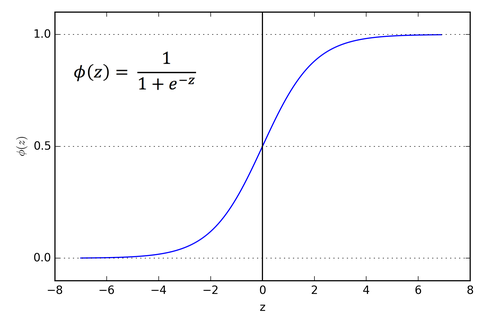

그래프 분석

1. 0 ~ 1 사이의 값을 출력하기 위해 선형 방정식의 출력 z를 사용
2. 그러나 자연상수 e를 사용하여 계산하기 때문에 비용 소모가 크다는 단점이 존재함
3. **z : -∞ ~ +∞ -> Φ(z) : 0 ~ 1**
4. phi(z) 값은 절대로 0 ~ 1 외의 값을 가질 수 없음(0~100%까지의 확률로 해석 가능)

Numpy 라이브러리를 사용하여 그래프를 간단히 그릴 수 있음
1. 배열 z = -n ~ +n까지 0.1 간격으로 만들기

   여기서 n = 5, np.arange(-5, 5, 0.1) 형태로 선언
2. 각 z의 위치마다 Sigmoid 값(phi value)을 계산하여 저장
3. 지수함수 계산은 np.exp() 함수를 사용

In [ ]:
# 필요 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt

# 배열 z 선언
## 각 z 위치에 따른 Sigmoid value 계산
z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))

# 산점도 그리기
## plot 함수: 현재 z, phi의 사상을 그려줌
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

# 정말 0과 1은 아님. limit 값
print(phi[0])
print(phi[-1])

#### Logistic regression으로 이진 분류 수행

* **Scikit-learn에는 LogisticRegression 클래스가 준비**되어 있음
* 로지스틱 회귀를 훈련하기 전, 간단하게 이진 분류를 수행해보기
  * **이진 분류의 경우**

    1. Sigmoid function의 출력 > 0.5 -> Positive
    2. Sigmoid function의 출력 < 0.5 -> Negative

    즉, phi(z)의 값이 0.5를 기준으로 이보다 크면 양성, 이보다 작으면 음성

* **Numpy 배열 : Boolean Indexing** 기능이 있음
 * True, False 값을 전달하여 행을 선택할 수 있음
 * 선택하고자 하는 원소 -> True
 * 선택하지 않을 원소 -> False


In [ ]:
# Boolean Indexing
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])

# A, C만 출력
print(char_arr[[True, False, True, False, False]])

In [ ]:
# 훈련 세트에서 도미와 빙어의 행만 골라내기
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')

# 훈련 입력(Only 도미, 빙어)
train_bream_smelt = train_scaled[bream_smelt_indexes]

# 훈련 출력(Only 도미, 빙어)
target_bream_smelt = train_target[bream_smelt_indexes]

1. bream_smelt_indexes 배열 : 도미와 빙어일 경우 True, 그 외에 False 값을 가짐
2. 위의 배열을 사용하여 train_scaled와 train_target 배열에 Boolean indexing을 적용하면 손쉽게 도미와 빙어 데이터를 골라낼 수 있음

        이제 도미와 빙어 데이터로 로지스틱 회귀 모델을 통한 이진 분류를 진행하기
        LogisticRegression 클래스 : 선형 모델이므로 sklearn.linear_model 패키지 하에 존재

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

print(lr.predict(train_bream_smelt[:5]))

In [ ]:
# 훈련 세트의 처음 5개 샘플에 대한 예측 확률
print(lr.predict_proba(train_bream_smelt[:5]))

    샘플마다 2개의 확률이 출력 -> 1열: Negative(0), 2열: Positive(1)
    그렇다면 Bream과 Smelt 중 어떤 것이 양성 클래스인가?
       
    앞서 말했듯이 Scikit-learn은 "Target value를 알파벳순으로 정렬"하여 사용
    classes_ 속성에서 확인 가능

In [ ]:
print(lr.classes_)

# ['Bream' 'Smelt'] -> [0, 1]

In [ ]:
# 로지스틱 회귀가 학습한 계수 확인
print(lr.coef_, lr.intercept_)

로지스틱 회귀 모델이 학습한 선형 방정식

**z = -0.404 * (Weight) + (-0.576) * (Length) + (-0.663) * (Diagonal) + (-1.013) * (Height) + (-0.732) * (Width) + (-2.161)**

***선형 방정식의 출력 z를 사용하여 Sigmoid function에 입력 후, 0 ~ 1 사이의 확률 값을 얻어내기**

    LogisticRegression 클래스 : decision_function() 메서드를 통해 z값을 출력할 수 있다.
    train_bream_smelt의 처음 5개 샘플에 대한 출력 z값을 계산하기


In [ ]:
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

1. decisions : 처음 5개 샘플에 대한 각각의 z값들, 이 값들을 Sigmoid function에 통과시켜 Probabilities 계산
2. Python의 Scipy 라이브러리 : **Sigmoid function 제공 -> expit() 라이브러리**

   np.exp() 함수를 사용하여 분수 계산하는 것보다 훨씬 편리하며 안전함

   **scipy.special 패키지** 하에 **expit 라이브러리**

In [ ]:
from scipy.special import expit
print(expit(decisions))

    위의 코드 출력값을 보면 predict_proba() 메서드 출력의 두 번째 열의 값과 동일. 즉, decision_function() 메서드는 양성 클래스에 대한 z값을 반환
    
    이진 분류의 경우
    1. predict_proba() 메서드: 음성 클래스와 양성 클래스에 대한 확률을 출력
    2. 양성 클래스에 대한 z값을 계산함(음성 x)
    3. coef_ 속성과 intercept_ 속성 : 로지스틱 회귀가 학습한 계수들이 저장되어있음

    이제 다중 분류를 살펴볼 시간
    

#### Logistic regression으로 다중 분류 수행

**LogisticRegression 클래스**

1. LogisticRegression 클래스를 사용하여 7개의 생선을 분류하며 이진 분류와의 차이점을 파악하기

2. 기본적으로 반복적인 알고리즘을 사용

    max_iter 매개변수를 통해 반복 횟수를 지정(기본값 = 100)

    여기서는 small dataset이므로 반복 횟수를 1000으로 늘려야 함

3. Ridge 회귀와 같이 계수의 제곱을 규제(L2 규제)

    Ridge : alpha parameter를 통한 규제 조절

    alpha ↑ -> 규제 강도 ↑
    
4. LogisticRegression에서 규제를 제어하는 매개변수 = C(기본값 = 1)

    여기서는 규제를 완화하기 위해 C = 20으로 늘리기
____________________________________________________________________
LogisticRegression 클래스를 통해 다중 분류 모델을 훈련하기 = train_scaled와 train_target을 사용



In [ ]:
# 객체 생성 및 훈련
## C = 20 -> 규제 완화, max_iter = 1000 -> 반복 횟수 늘림
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)

# 훈련 점수 및 테스트 점수 파악
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

결과: 다행히 과대적합 및 과소적합으로 빠지지는 않음

In [ ]:
# 테스트 세트의 처음 5개 샘플에 대한 예측
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]

 5개의 행에 대한 7개 생선에 대한 확률 -> 7개의 열 출력

In [ ]:
print(lr.classes_)

**다중 분류 결과**

1. 이진 분류는 샘플마다 2개의 확률을 출력하고 다중 분류는 샘플마다 num_classes 개수만큼 확률을 출력
2. 여기서는 **가장 높은 확률 = 예측 클래스**가 됨
_____________________________________________________________________
**다중 분류의 선형 방정식 형태는? -> coef_ 속성과 intercept_ 속성을 통해 구할 수 있음**

In [ ]:
print(lr.coef_)
print(lr.intercept_)

# 형태
print(lr.coef_.shape, lr.intercept_.shape)

1. lr.coef_.shape = (7, 5)
2. lr.intercept_.shape = (7,)

    5개의 특성을 사용하므로 coef_ 배열의 열은 5개, 행은 7개

    intercept_ : 7개
___________________________________________________________
이진 분류: z 값 2개 계산, SIgmoid function을 통한 확률 변환

**다중 분류** : 클래스마다 z 값을 하나씩 계산, **Softmax function을 통한 확률 변환**



**Softmax function**
* **여러 개의 선형 방정식**의 출력값을 0 ~ 1 사이로 압축
* 지수 함수를 사용하기 때문에 **정규화된 지수 함수**라고도 부름

Sigmoid function
* **하나의 선형 방정식**의 출력값을 0 ~ 1 사이로 압축
______________________________________

### Softmax function

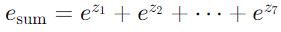

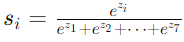

    s1 + s2 + ... + s7 = 분자와 분모가 같아지므로 1이 됨
    7개 생선에 대한 확률의 합은 1이 되어야하므로 올바른 결과

In [ ]:
# decision_function -> z값 구하기
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

scipy.special 해키지 하에 softmax() 함수 제공


In [ ]:
# softmax 라이브러리 임포트
from scipy.special import softmax

# axis=1 -> 각 샘플(행)에 대해 확률 계산
proba = softmax(decision, axis=1)

# 각 행의 z값들에 대한 확률 구하기
print(np.round(proba, decimals=3))

### 문제 해결 과정
**로지스틱 회귀로 확률 예측**
1. 분류 모델: 예측뿐만 아니라 예측의 근거가 되는 확률도 출력 가능

2. KNN 알고리즘: 확률을 출력할 수 있지만 이웃한 샘플의 클래스 비율값을 계산

   -> 항상 정해진 확률만 출력하게 됨

3. 로지스틱 회귀(이진 분류): 회귀가 아닌 분류 모델로서 선형 방정식을 사용
    * 0 ~ 1 사이로 입력값을 사상
    * 하나의 선형 방정식을 훈련 -> Sigmoid function 통과 -> 0 ~ 1 사이의 값으로 압축
    * 이 값이 0.5보다 크면 양성, 0.5보다 작으면 음성

4. 로지스틱 회귀(다중 분류) : 여러 개의 선형 방정식을 사용
    * 0 ~ 1 사이로 입력값을 사상
    * 여러 개(num_classes 값)의 선형 방정식을 훈련 -> Softmax function 통과 -> 0 ~ 1 사이의 값으로 압축
    * 전체 클래스에 대한 확률값들의 합 = 1이 되도록 만듦

### 마무리

1. Keywords
    * **Logistic Regression** : 선형 방정식을 사용한 분류 알고리즘

    선형 회귀와 달리 **Sigmoid function 혹은 Softmax function을 사용하여 클래스 확률을 출력**

    * **Multi-Nomial Logistic Regression** : 타깃 클래스가 2개 이상인 분류 문제

    * **Sigmoid Function** : **이진 분류 전용**, **하나**의 선형 방정식의 출력 -> 0 ~ 1 사이의 값으로 압축

    * **Softmax Function** : **다중 분류 전용**, **여러** 선형 방정식의 출력 -> 0 ~ 1 사이의 값으로 압축

2. 핵심 package와 function
    * **scikit-learn**
     * **LogisticRegression** : 선형 분류 알고리즘인 로지스틱 회귀 클래스
        * solver 매개변수: 기본값 = 'lbfgs'
        * penalty 매개변수: L2 규제(Ridge)와 L1 규제(Lasso)를 선택 가능, 기본값 = 'l2'
        * C 매개변수: 규제의 강도를 제어하며 기본값 = 1.0, 값이 작을수록 규제가 강해짐
     * predict_proba() : 예측 확률을 반환하는 메서드
        * 이진 분류 : 각 샘플마다 음성 클래스와 양성 클래스에 대한 확률을 반환
        * 다중 분류 : 클래스의 개수만큼 각 샘플마다 확률값들을 반환
    * decision_function() : 모델이 학습한 선형 방정식의 출력값을 반환(로지스틱 회귀: z값)
        * 이진 분류 : 양성 클래스의 확률이 반환. 이 값이 0보다 크면 양성 클래스, 0보다 작거나 같으면 음성 클래스로 예측
        * 다중 분류 : 클래스 개수만큼 선형 방정식을 계산. 가장 큰 값의 클래스 확률이 예측 클래스가 됨